In [ ]:
# Q1 will be submitted in the comments as a link. 

In [ ]:
# Q3. Set Up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelBinarizer

df = pd.read_csv('data/heart_hw.csv')

print("df.shape:")
print(df.shape, '\n')

print("df.dtypes:")
print(df.dtypes, '\n')

print("df.columns:")
print(df.columns, '\n')

df.isna().any()
df.head()

df.shape:
(103, 4) 

df.dtypes:
Unnamed: 0     int64
age            int64
transplant    object
y              int64
dtype: object 

df.columns:
Index(['Unnamed: 0', 'age', 'transplant', 'y'], dtype='object') 



,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


In [ ]:
# Q3, Part 1 

df = pd.read_csv('data/heart_hw.csv')

# Turn into 0 and 1 for binary indicator 
df["treat"] = (df["transplant"].str.strip().str.lower() == "treatment").astype(int)

df['y'] = pd.to_numeric(df['y'], errors='coerce')
df = df.dropna(subset=['transplant', 'y']) # Drop missing values

p_control = df.loc[df['treat'] == 0, 'y'].mean()
p_treatment = df.loc[df['treat'] == 1, 'y'].mean()
ate = p_treatment - p_control

# Print results (NO f-strings)
print("Control group survival rate:", p_control)
print("Treatment group survival rate:", p_treatment)
print("Average Treatment Effect (ATE):", ate)

# Based on the results, those who survived who were in the control that did nbot receive a transplant was 0.1176. Whereas, the difference between those who survived in the treatment and control group is 0.23017. 


Control group survival rate: 0.11764705882352941
Treatment group survival rate: 0.34782608695652173
Average Treatment Effect (ATE): 0.23017902813299232


In [ ]:
# Q3, Part 2
import numpy as np
import pandas as pd

y = df["y"].astype(float)
x = df["treat"].astype(float)

def slr(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1 * x_bar
    y_hat = b0 + b1 * x
    residuals = y - y_hat
    return {'b0': b0, 'b1': b1, 'y_hat': y_hat, 'residuals': residuals}

reg = slr(x, y)

print('Coefficients: ',reg['b0'],reg['b1'])

# The intercept in the regression model is = to the control group's survival rate, and the coefficient on the transplant variable is = to the ATE. This is because the regression is modeling the binary treatment variable with an intercept. 

Coefficients:  0.11764705882352941 0.23017902813299232


In [ ]:
# Q3, Part 3 
import numpy as np
import pandas as pd

df = pd.read_csv('data/heart_hw.csv')
df["treat"] = (df["transplant"].str.strip().str.lower() == "treatment").astype(int)

y = df['y'].astype(float)
x1 = df['treat'].astype(float)
x2 = df['age'].astype(float)

def slr(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1 * x_bar
    y_hat = b0 + b1 * x
    residuals = y - y_hat
    return {'b0': b0, 'b1': b1, 'y_hat': y_hat, 'residuals': residuals}

reg1_y = slr(x1, y)
reg1_2 = slr(x1, x2)

y_temp = reg1_y['residuals']
x2_temp = reg1_2['residuals']
reg_y_x2 = slr(x2_temp, y_temp)
print('Age coefficient: ', reg_y_x2['b1'])

reg2_y = slr(x2, y)
reg2_1 = slr(x2, x1)
y_resid = reg2_y['residuals']
x1_resid = reg2_1['residuals']
reg_y_x1 = slr(x1_resid, y_resid)
print('Treatment coefficient: ', reg_y_x1['b1'])

b0 = np.mean(y) - reg_y_x1['b1'] * np.mean(x1) - reg_y_x2['b1'] * np.mean(x2)
print('Intercept: ', b0, '\n')

# The intercept increased a lot more than in the previous part, largely due to "age" variable being added into the regression. 


Age coefficient:  -0.013607217160218649
Treatment coefficient:  0.26470168650367504
Intercept:  0.7019569721740948 



R-squared:  0.185916448204278


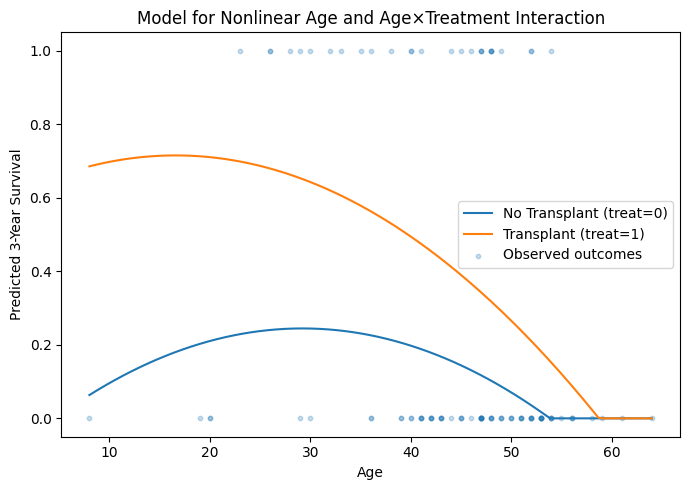

In [ ]:
#Q3, Part 4
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd


expander = PolynomialFeatures(degree=2, include_bias=False)
Z = expander.fit_transform(df[["age", "treat"]])
names = expander.get_feature_names_out(["age", "treat"])
X = pd.DataFrame(Z, columns=names)[["age", "treat", "age^2", "age treat"]]
y = df["y"]

reg = LinearRegression().fit(X, y)
print("R-squared: ", reg.score(X, y))

Z_control = expander.transform(control[["age", "treat"]])
Z_treatment  = expander.transform(treatment[["age", "treat"]])

X_control = pd.DataFrame(Z_control, columns=names)[["age", "treat", "age^2", "age treat"]]
X_treatment = pd.DataFrame(Z_treatment,  columns=names)[["age", "treat", "age^2", "age treat"]]

p_control = reg.predict(X_control)
p_treatment  = reg.predict(X_treatment)

p_control = np.clip(p_control, 0.0, 1.0)
p_treatment  = np.clip(p_treatment, 0.0, 1.0)

plt.figure(figsize=(7,5))
plt.plot(ages, p_control, label="No Transplant (treat=0)")
plt.plot(ages, p_treatment,  label="Transplant (treat=1)")
plt.scatter(df["age"], df["y"], s=10, alpha=0.25, label="Observed outcomes")
plt.xlabel("Age")
plt.ylabel("Predicted 3-Year Survival")
plt.title("Model for Nonlinear Age and Age×Treatment Interaction")
plt.legend()
plt.tight_layout()
plt.show()

# Both lines decline with age in a non linear way (curved). Transplant has higher survival rates for younger patients and on average have higher predicted sutvival than non transplant curve. At a certain high age, the number hits 0 meaning there is a level where the survival is slim/ none. 

In [ ]:
# Q3, Part 5

# In terms of how it is built, there are always bias' with data and this a large concern because there can be socioeconomic/statistical data that may determine who gets a transplant. Something like a major organization that holds lives at risks needs to use a more complex system than just a linear regression model that we saw earlier. It must be include many different facets and account for many different variables than just the three that we worked with. 

# In terms of how it is distributed, there still needs to be some thresholds and calibrations that are checked byu humans or else there could be mistakes during use that humans may not be aware of which could cause lots of issues. Another issue is what to do with privacy breaches and who gets to see all this private information about people and if it can get distributed wihtin the program. This can be extremely dangerous if the data falls into the wrong hands. 

In [ ]:
#Citation:
# OpenAI. (2023). ChatGPT (October 5 version) [Large language model]. https://chat.openai.com/chat